In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

In [ ]:
df = pd.read_csv('MSFT.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700
8524,2020-01-07,159.320007,159.669998,157.330002,157.580002,157.580002,18017762


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03
mean,28.220247,28.514473,27.918967,28.224480,23.417934,6.045692e+07
std,28.626752,28.848988,28.370344,28.626571,28.195330,3.891225e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.414063,3.460938,3.382813,3.414063,2.196463,3.667960e+07
50%,26.174999,26.500000,25.889999,26.160000,18.441576,5.370240e+07
75%,34.230000,34.669998,33.750000,34.230000,25.392508,7.412350e+07
max,159.449997,160.729996,158.330002,160.619995,160.619995,1.031789e+09


In [ ]:
df.count()

Date         8525
Open         8525
High         8525
Low          8525
Close        8525
Adj Close    8525
Volume       8525
dtype: int64

In [ ]:
df.interpolate

<bound method DataFrame.interpolate of             Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.062549   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.064783   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065899   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.064224   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.063107   
...          ...         ...         ...         ...         ...         ...   
8520  2019-12-31  156.770004  157.770004  156.449997  157.699997  157.699997   
8521  2020-01-02  158.779999  160.729996  158.330002  160.619995  160.619995   
8522  2020-01-03  158.320007  159.949997  158.059998  158.619995  158.619995   
8523  2020-01-06  157.080002  159.100006  156.509995  159.029999  159.029999   
8524  2020-01-07  159.320007  159.669998  157.330002  157.580002  157.580002   



In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
df = df.fillna(df.mean())

<ipython-input-7-f04fa993581b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


(array([2862., 3318., 1197.,  416.,  176.,  132.,  194.,   71.,  113.,
          41.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

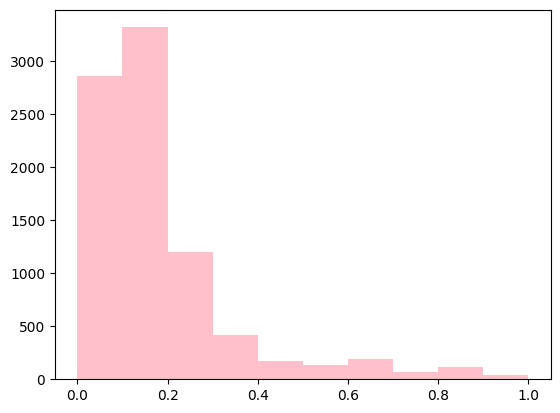

In [ ]:
plt.hist(df['Close'],color="pink")

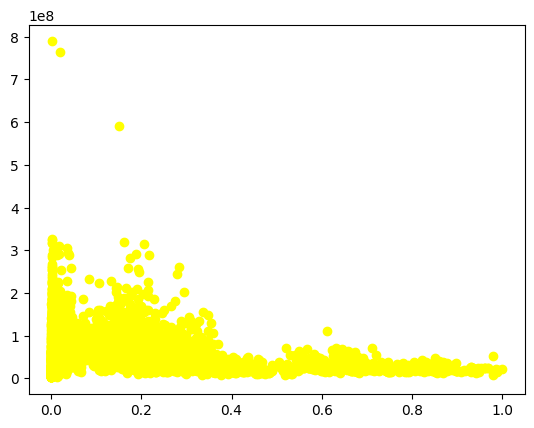

In [ ]:
plt.scatter(df['Close'],df['Volume'],color="yellow")

In [ ]:
df.corr

<bound method DataFrame.corr of                Close    Volume  Close_Lag1  Close_Rolling_Mean
Date                                                          
1986-03-20  0.000032  58435200    0.098090            0.000056
1986-03-21  0.000016  59990400    0.095486            0.000047
1986-03-24  0.000000  65289600    0.092882            0.000031
1986-03-25  0.000011  32083200    0.090278            0.000022
1986-03-26  0.000027  22752000    0.092014            0.000017
...              ...       ...         ...                 ...
2019-12-31  0.981810  18369400  157.589996            0.984053
2020-01-02  1.000000  22622100  157.699997            0.988089
2020-01-03  0.987541  21116200  160.619995            0.988027
2020-01-06  0.990095  20813700  158.619995            0.988114
2020-01-07  0.981063  18017762  159.029999            0.988102

[8520 rows x 4 columns]>

<Axes: ylabel='Date'>

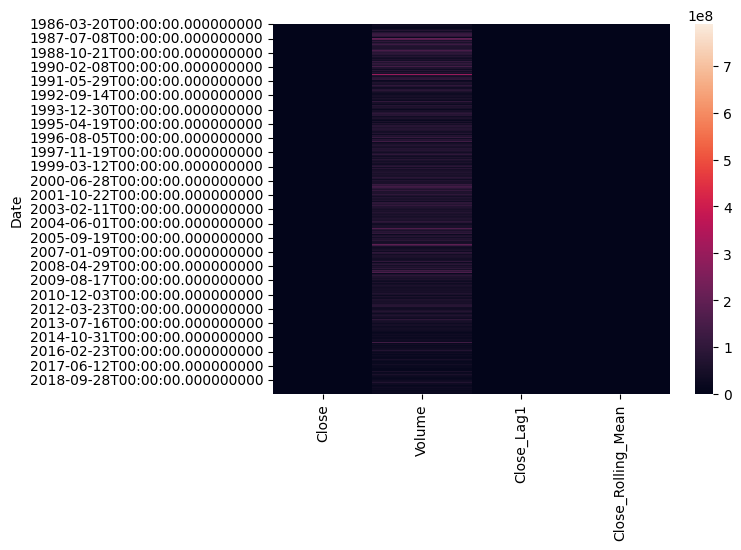

In [ ]:
sns.heatmap(df)

In [ ]:
df= df[['Date', 'Close', 'Volume']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Close_Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)

<ipython-input-10-5e6049227752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-10-5e6049227752>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_Lag1'] = df['Close'].shift(1)
<ipython-input-10-5e6049227752>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [ ]:
X = df[['Close_Lag1', 'Volume']]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-16-fe700bd950b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


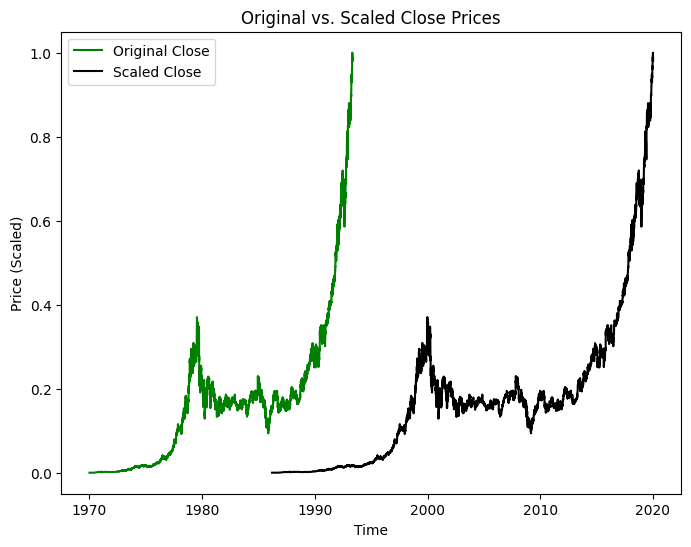

In [ ]:
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
original_close = df['Close'].values.reshape(-1, 1)
scaled_close = df['Close']

plt.figure(figsize=(8,6))
plt.plot(original_close, label='Original Close', color='green')
plt.plot(scaled_close, label='Scaled Close', color='black')
plt.title('Original vs. Scaled Close Prices')
plt.xlabel('Time')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()

In [ ]:
# Feature engineering
window_size = 5
df['Close_Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
df.dropna(inplace=True)

<ipython-input-17-0279902b9a07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
<ipython-input-17-0279902b9a07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
X = df[['Close_Lag1', 'Volume', 'Close_Rolling_Mean']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

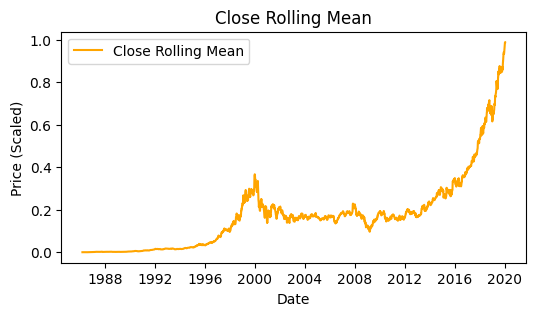

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(df.index, df['Close_Rolling_Mean'], label='Close Rolling Mean', color='orange')
plt.title('Close Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()

In [ ]:
#model training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 0.0020963102823643442
R-squared (R2) Score: 0.9995301937503837


In [ ]:
threshold = 0.01
correct_predictions = abs(y_test - y_pred) <= threshold
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f'Accuracy: {accuracy:.2%}')


Accuracy: 97.01%


In [ ]:
new_data_point = pd.DataFrame({'Close_Lag1': [300], 'Volume': [50000000],'Close_Rolling_Mean':[500]})
predicted_price = model.predict(new_data_point)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 214.42287718582924
